 # <center>Climate Change Belief Analysis</center>
 ### <center> Advanced Classification Team 7</center>

© Explore Data Science Academy

---




## <center>Introduction</center>

Climate change is a major issue in the 21st century as evidenced by the high number of studies that forecast doom.
The concern is that if enviromental impact is not taken seriously by governments, corporations, businesses and individuals. Consequently, businesses opt for processes that take into account the final carbon print with the aim of appealing to a public that is in love with the concept of a green planet. In this project, the goal is to develop a machine learning model that analyse tweets to ascertain the general sentiments towards the concept of climate change. The key deliverables for the project include:
- 1. Develop a robust model that can accurately determine sentiments from text (in this case tweets).
- 2. Provide a clear explanation about the performance and accuracy of the best model.
- 3. Analyse the provided data.
- 4. Provide recommendations based on the results from the best performing model.


<a id="cont"></a>

## Table of Contents


<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Feature Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd '/content/drive/MyDrive/Athena - Explore/Advanced Classification/Predict/2110ACDS_T7_C_Predict'

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Libraries for Data Preprocessing and Modelling
import string
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE 
import warnings
warnings.filterwarnings("ignore")

# Set Plot Style
sns.set()

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, we load the data and preview all the files. The objective is to familiarize with the data |

---

In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
samplesubmission = pd.read_csv('data/sample_submission.csv')

# Preview Train Data
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
# Preview the Test Data
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [5]:
df_test.shape


(10546, 2)

In [6]:
# Check the Sample Submission File
samplesubmission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [7]:
print('Dataset size:',df_train.shape)
print('Columns are:',df_train.columns)

Dataset size: (15819, 3)
Columns are: Index(['sentiment', 'message', 'tweetid'], dtype='object')


The dataset containts 15819 rows and three columns. Understanding the shape and size of the dataset provides a key insight about the features of in the dataset. It has a significant impact on the preprocessing and modelling techniques applied to the dataset. 

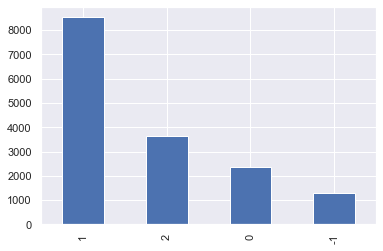

In [8]:
df_train['sentiment'].value_counts().plot(kind='bar')
plt.show()

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


A simple preview of the dataset reveals important information about the shape and size of the dataset. The key things to take into account include:
* The dataset has three features and over 15,000 rows. 
* The two main datatypes are int and object. 
* From a glance, there are no null values in the dataset.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


Exploratory Data Analysis is significant part of the data modelling process. It helps Data Scientists familiarize with different characteristics of the dataset. It is an opportunity for one to understand what needs to be done to get the right answers from the data. Some of the key objectives during the EDA process include:
* Checking anomalies in the dataset.
* Testing hypothesis to ensure that the data can help get the answers that are in line withe goal of the project.
* Visualization facilitates the discovery of patterns in the dataset and the relationships among the features in the dataset. 
* The validity of the results from the EDA process has a significant effect on the validity of the final outcome of the modelling process. 

### 3.1. Data Preprocessing

In preprocessing, a function that can remove noise in the form of numerical characters, punctuation, web url, spaces and characters that are less than two words. The goal is to come with a message that is ready lemmatization, stemming and removal of stopwords. 

In [10]:
# Create a copy of the dataset for modelling. 
df = df_train.copy()
df.tail(10)

,sentiment,message,tweetid
15809,2,The quest to capture and store carbon — and sl...,705048
15810,0,This global warming so late in the season is p...,572819
15811,1,RT @StephenSchlegel: she's thinking about how ...,426353
15812,1,RT @SierraClub: 2016: hottest year in history....,989478
15813,1,RT @thinkprogress: EPA head falsely claims car...,442853
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


In [11]:
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

### Cleaning Text
* Removing Special Characters
* Lemmatizing words
* Lowering words

In [12]:

wn = WordNetLemmatizer()

def text_preprocessing(review):
  """ Takes into text data and preprocesses before returning text data."""
  review = re.sub('[^a-zA-Z]', ' ', review)
  review = review.lower()
  review = review.split()
  review = [wn.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  return review

In [13]:
df = df_train.copy()
test_data = df_test.copy()
# Apply Preprocessing
df['message'] = df['message'].apply(text_preprocessing)
test_data['message'] = test_data['message'].apply(text_preprocessing)
print(df.head())
print(test_data.head())

   sentiment                                            message  tweetid
0          1  polyscimajor epa chief think carbon dioxide ma...   625221
1          1    like lack evidence anthropogenic global warming   126103
2          2  rt rawstory researcher say three year act clim...   698562
3          1  todayinmaker wired pivotal year war climate ch...   573736
4          1  rt soynoviodetodas racist sexist climate chang...   466954
                                             message  tweetid
0  europe looking china make sure alone fighting ...   169760
1  combine polling staffer climate change woman r...    35326
2  scary unimpeachable evidence climate change al...   224985
3  karoli morgfair osborneink dailykos putin got ...   476263
4  rt fakewillmoore female orgasm cause global wa...   872928


###  3.2. Word Cloud Visualisation
Word clouds provide graphical representation of the word frequency. The size of the word in the word cloud increases with increase in frequency. Therefore, the bigger words are the most common the in the text. In this section, we use word cloud to check the words that are most common in the tweet messages based on the sentiments. 
Word cloud can help with the following:
*  Make it easy to see the most common words in the text. 
* The salient themes in the text can be identified to make sense of the text in relation to the objective of the analysis. 


(-0.5, 399.5, 199.5, -0.5)

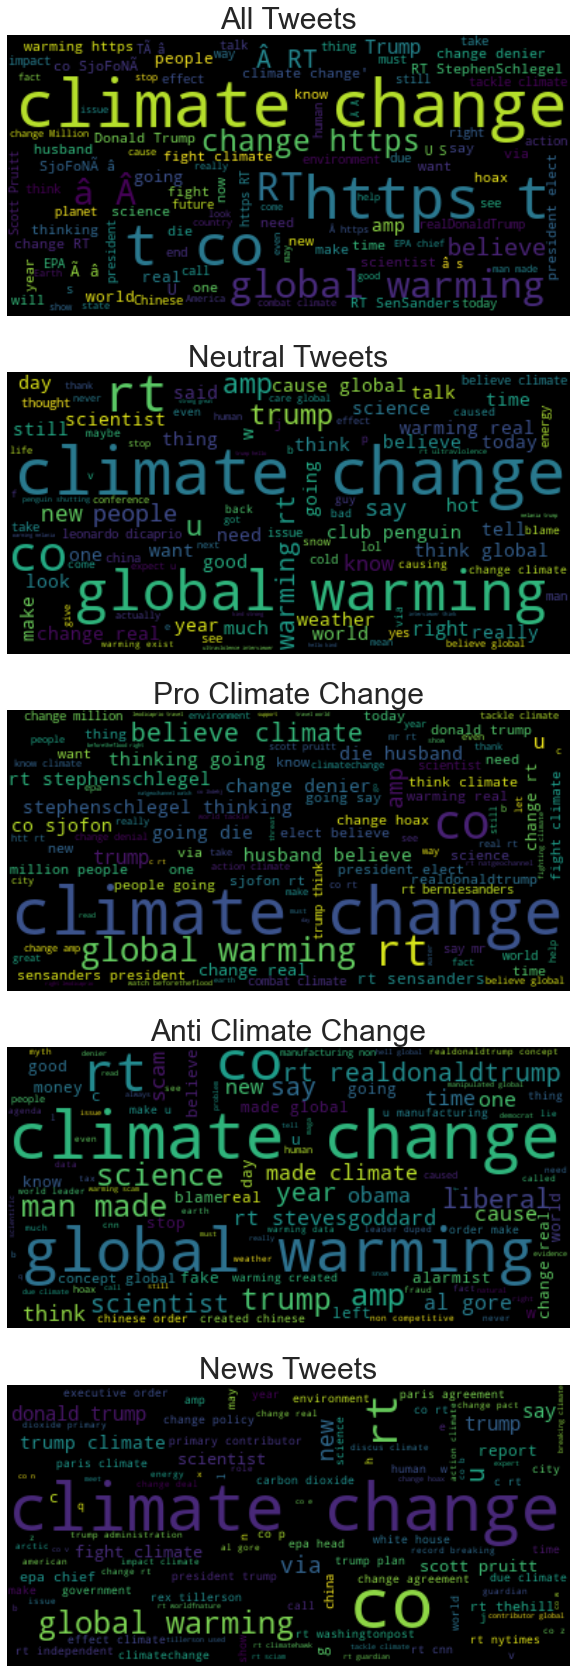

In [18]:
# Create DataFrame for Each Sentiment
df_sent1 = df[df['sentiment']==1]
df_sent0 = df[df['sentiment']==0]
df_sentneg = df[df['sentiment']==-1]
df_sent2 = df[df['sentiment']==2]

tweet_All = " ".join(review for review in df_train.message)
tweet_sent0 = " ".join(review for review in df_sent0.message)
tweet_sent1 = " ".join(review for review in df_sent1.message)
tweet_sentneg = " ".join(review for review in df_sentneg.message)
tweet_sent2 = " ".join(review for review in df_sent2.message)

fig, ax = plt.subplots(5, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)
wordcloud_sent0 = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_sent0)
wordcloud_sent1 = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_sent1)
wordcloud_sentneg = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_sentneg)
wordcloud_sent2 = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_sent2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_sent0, interpolation='bilinear')
ax[1].set_title('Neutral Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_sent1, interpolation='bilinear')
ax[2].set_title('Pro Climate Change',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_sentneg, interpolation='bilinear')
ax[3].set_title('Anti Climate Change',fontsize=30)
ax[3].axis('off')
ax[4].imshow(wordcloud_sent2, interpolation='bilinear')
ax[4].set_title('News Tweets',fontsize=30)
ax[4].axis('off')

#wordcloud.to_file("img/first_review.png")

Important Takeaways:
* Words like climate change and global warming that appear in all categories. They are general words that are associated with conversations about climate change. 
* The removal of words that appear in all categories and stopwords is likely to have no effect on the performance of the classification model. 
* Scam is one of the frequent words for tweets that claim climate change is not real. Politics is closely connected to discussion about climate change as evidenced by the frequency of names like Trump and Obama. 
* Countries and their policies are a significant part of the climate change news from major media outlets. 

<a id="four"></a>
## 4. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

Feature engineering includes all the steps taken to create new variables from the training dataset. The goal is generate new features for supervised for unsupervised learning to simplify data transformations, while improving model accuracy.  Feature engineering in natural language processing includes but not limited to the tokenization, stemming and creating a bag of words. All these steps are meant to make it possible for the classification model to understand and analyse the text data.  
In this section the objectives include:
* Create features that can be understood by a simple classification model. 
* Review all the features in the dataset and minimize their negative impact on model performance. 
* Leverage the results of the EDA process to create new features with the aim of improving model accuracy. 

### 4.2. Text Vectorization

The process of converting text to numbers that machine learning models can understand is called vectorization.  Term Frequency Inverse Document Frequency(TFID) is a an algorithm from scikit-learn library that helps with vectorization of text data.

In [15]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

In [16]:
X = vectorizer.fit_transform(df['message']).toarray()

training = pd.DataFrame(X, columns=vectorizer.get_feature_names())

print(training.shape)


X_test = vectorizer.transform(test_data['message']).toarray()
new_test= pd.DataFrame(X_test, columns=vectorizer.get_feature_names())

print(new_test.shape)

(15819, 30783)
(10546, 30783)


In [17]:
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief think carbon dioxide ma...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt rawstory researcher say three year act clim...,698562
3,1,todayinmaker wired pivotal year war climate ch...,573736
4,1,rt soynoviodetodas racist sexist climate chang...,466954


In [18]:
X = training
y = df['sentiment']

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [19]:
# Balancing Data
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

### SGDCLassifier

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.1, random_state=0)
model = SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier()

In [21]:
# Accuracy score
pred = model.predict(X_test)
print("Train Accuracy Score:",round(model.score(X_train, y_train),2))
print("Test Accuracy Score:",round(accuracy_score(y_test, pred),2))

Train Accuracy Score: 0.9
Test Accuracy Score: 0.73


In [34]:
# evaluate one or more ML models
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.93      0.98      0.96       821
           0       0.90      0.89      0.90       893
           1       0.89      0.75      0.82       849
           2       0.86      0.96      0.91       849

    accuracy                           0.90      3412
   macro avg       0.90      0.90      0.89      3412
weighted avg       0.90      0.90      0.89      3412



### Passive Aggressive Classifier

In [25]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_clf = PassiveAggressiveClassifier()

pa_clf.fit(X_train, y_train)

pa_pred = pa_clf.predict(X_test)

In [26]:
# evaluate one or more ML models
print(classification_report(y_test, pa_pred))

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99       821
           0       0.93      0.98      0.95       893
           1       0.97      0.85      0.90       849
           2       0.94      0.98      0.96       849

    accuracy                           0.95      3412
   macro avg       0.95      0.95      0.95      3412
weighted avg       0.95      0.95      0.95      3412



### Logistic Regression

In [25]:
samplesubmission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [27]:
sub_pred = pa_clf.predict(new_test)
submission = pd.DataFrame()
submission['tweetid'] = df_test['tweetid']
submission['sentiment'] = sub_pred
submission.to_csv('submission.csv', index=False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic